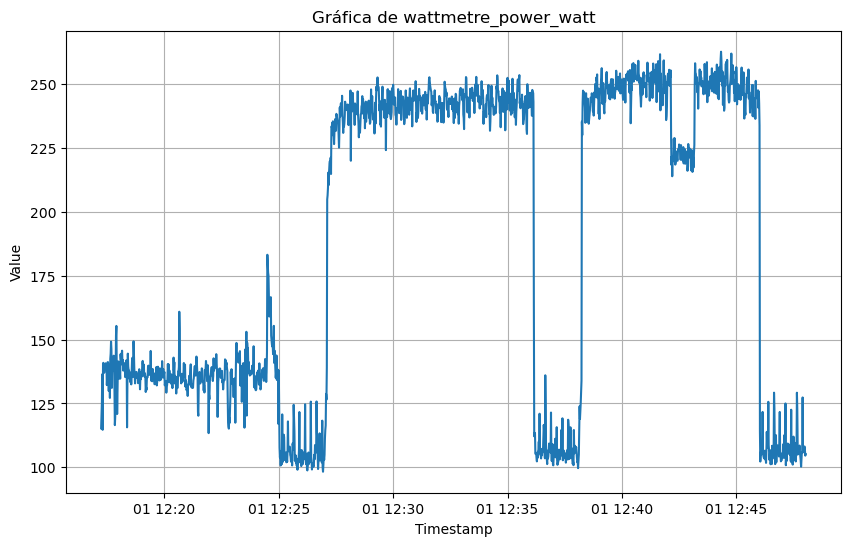

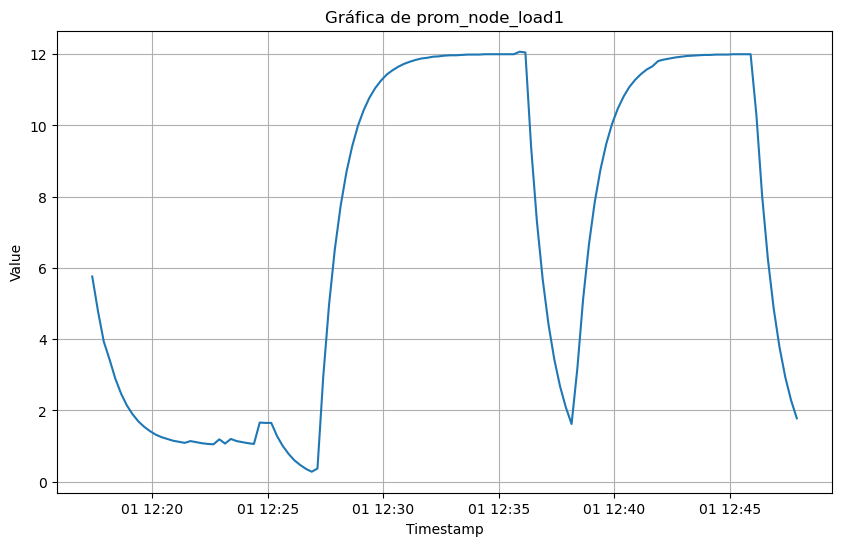

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame se llama 'df' (si no, reemplázalo con el nombre correcto)
# Si aún no has cargado el CSV, descomenta y ajusta la siguiente línea:
df = pd.read_csv('20250601/onnx/1885429_onnx_mob.csv')

# Lista de las metric_id que quieres graficar
#metricas_a_graficar = ['wattmetre_power_watt', 'bmc_node_power_watt', 'prom_node_load1']
metricas_a_graficar = ['wattmetre_power_watt', 'prom_node_load1']

# Iterar sobre cada métrica y crear un gráfico
for metrica in metricas_a_graficar:
    # Filtrar el DataFrame para la métrica actual
    df_filtrado = df[df['metric_id'] == metrica].copy()

    # Asegurarse de que 'timestamp' sea de tipo datetime (si no lo es)
    if not pd.api.types.is_datetime64_any_dtype(df_filtrado['timestamp']):
        df_filtrado.loc[:, 'timestamp'] = pd.to_datetime(df_filtrado['timestamp'])

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado['timestamp'], df_filtrado['value'])
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(f'Gráfica de {metrica}')
    plt.grid(True)
    plt.show()

Leyendo los archivos CSV...
- 20250601/tf/mob\1885423_tf_mob.csv: Leído con 2724 líneas.
- 20250601/tf/mob\1885425_tf_mob.csv: Leído con 2101 líneas.
- 20250601/tf/mob\1885430_tf_mob.csv: Leído con 2842 líneas.
- 20250601/tf/mob\1885448_tf_mob.csv: Leído con 2849 líneas.
- 20250601/tf/mob\1885450_tf_mob.csv: Leído con 2726 líneas.
- 20250601/tf/mob\1885455_tf_mob.csv: Leído con 2119 líneas.
- 20250601/tf/mob\1885477_tf_mob.csv: Leído con 2113 líneas.
- 20250601/tf/mob\1885479_tf_mob.csv: Leído con 2732 líneas.
- 20250601/tf/mob\1885480_tf_mob.csv: Leído con 2869 líneas.

Generando las gráficas con el número de línea como eje x...


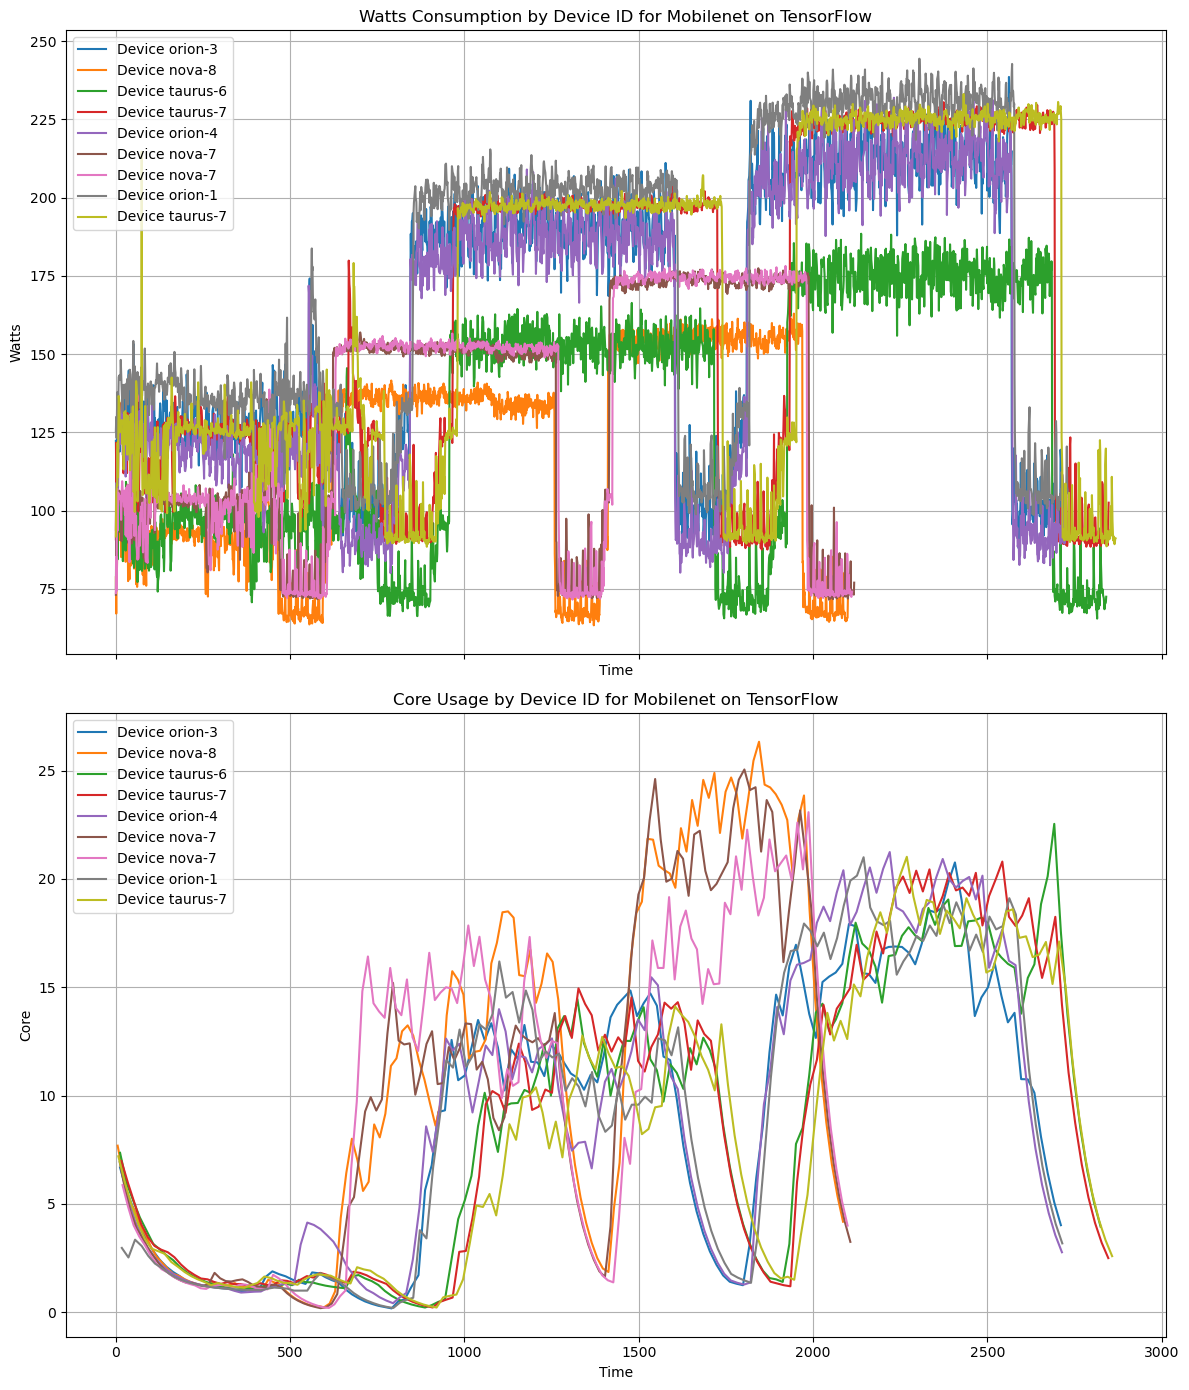

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Directorio donde se encuentran los archivos CSV
model = ['mob', 'res']
s_m = model[0]
framew = ['onnx', 'tf']
fw = framew[1]
directorio_csv = '20250601/' + fw + '/' + s_m
patron_csv = os.path.join(directorio_csv, '*.csv')
archivos_csv = glob.glob(patron_csv)

metricas_a_graficar = ['wattmetre_power_watt', 'prom_node_load1']
num_metricas = len(metricas_a_graficar)

# Diccionario para almacenar los DataFrames por archivo
dataframes = {}

# Fase 1: Leer todos los archivos CSV
print("Leyendo los archivos CSV...")
for archivo in archivos_csv:
    try:
        df = pd.read_csv(archivo)
        # Crear un índice secuencial basado en las filas
        df['line_number'] = df.index
        dataframes[archivo] = df
        print(f"- {archivo}: Leído con {len(df)} líneas.")
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

# Fase 2: Graficar usando el índice secuencial como eje x
print("\nGenerando las gráficas con el número de línea como eje x...")
fig, axes = plt.subplots(num_metricas, 1, figsize=(12, 7 * num_metricas), sharex=True)
if num_metricas == 1:
    axes = [axes]

for i, metrica in enumerate(metricas_a_graficar):
    # Definir label y
    l_y = ['Watts','Core']
    if (metrica == 'wattmetre_power_watt' or metrica == 'bmc_node_power_watt'):
        y_label = l_y[0]
    else: y_label = l_y[1]

    # Definir Metric
    l_m = ['Watts Consumption','Core Usage']
    if (metrica == 'wattmetre_power_watt' or metrica == 'bmc_node_power_watt'):
        label_m = l_m[0]
    else: label_m = l_m[1]

    # Definir Modelo
    m_l = ['Mobilenet','Resnet']
    if s_m == 'mob':
        model = m_l[0]
    else: model = m_l[1]

    # Definir Framework
    f_w = ['Onnxruntime','TensorFlow']
    if fw == 'onnx':
        fwork = f_w[0]
    else: fwork = f_w[1]
    
    ax = axes[i]
    ax.set_title(f'{label_m} by Device ID for {model} on {fwork}')
    ax.set_ylabel(y_label)
    ax.set_xlabel('Time')
    ax.grid(True)

    for archivo, df in dataframes.items():
        df_filtrado = df[df['metric_id'] == metrica].copy()
        if not df_filtrado.empty:
            for device_id in df_filtrado['device_id'].unique():
                df_device = df_filtrado[df_filtrado['device_id'] == device_id]
                nombre_base = os.path.basename(archivo)
                ax.plot(df_device['line_number'], df_device['value'], label=f'Device {device_id}')

    ax.legend()

plt.tight_layout()
plt.show()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Configuraciones
model_options = ['mob', 'res']
selected_model = model_options[1]
framework_options = ['onnx', 'tf']
selected_framework = framework_options[1]
directorio_base = '20250601'
directorio_csv = os.path.join(directorio_base, selected_framework, selected_model)
patron_csv = os.path.join(directorio_csv, '*.csv')
archivos_csv = glob.glob(patron_csv)
metricas_a_graficar = ['wattmetre_power_watt', 'prom_node_load1']

# Directorio para guardar las imágenes PNG
directorio_imagenes = 'imagenes_sin_fondo'
os.makedirs(directorio_imagenes, exist_ok=True)

# Diccionario para almacenar los DataFrames por archivo
dataframes = {}

# Fase 1: Leer todos los archivos CSV
print("Leyendo los archivos CSV...")
for archivo in archivos_csv:
    try:
        df = pd.read_csv(archivo)
        # Crear un índice secuencial basado en las filas
        df['line_number'] = df.index
        dataframes[archivo] = df
        print(f"- {archivo}: Leído con {len(df)} líneas.")
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

# Fase 2: Generar y guardar las gráficas como archivos PNG sin fondo
print("\nGenerando y guardando las gráficas...")
for metrica in metricas_a_graficar:
    fig, ax = plt.subplots(figsize=(12, 7))

    # Definir label y
    y_labels = ['Watts', 'Core']
    y_label = y_labels[0] if metrica in ['wattmetre_power_watt', 'bmc_node_power_watt'] else y_labels[1]

    # Definir Metric
    metric_labels = ['Watts Consumption', 'Core Usage']
    metric_label = metric_labels[0] if metrica in ['wattmetre_power_watt', 'bmc_node_power_watt'] else metric_labels[1]

    # Definir Modelo
    model_labels = ['Mobilenet', 'Resnet']
    current_model_label = model_labels[0] if selected_model == 'mob' else model_labels[1]

    # Definir Framework
    framework_labels = ['Onnxruntime', 'TensorFlow']
    current_framework_label = framework_labels[0] if selected_framework == 'onnx' else framework_labels[1]

    ax.set_title(f'{metric_label} by Device ID for {current_model_label} on {current_framework_label}')
    ax.set_ylabel(y_label)
    ax.set_xlabel('Time')
    ax.grid(True)

    for archivo, df in dataframes.items():
        df_filtrado = df[df['metric_id'] == metrica].copy()
        if not df_filtrado.empty:
            for device_id in df_filtrado['device_id'].unique():
                df_device = df_filtrado[df_filtrado['device_id'] == device_id]
                ax.plot(df_device['line_number'], df_device['value'], label=f'Device {device_id}')

    ax.legend()
    plt.tight_layout()

    # Guardar la figura como PNG sin fondo
    nombre_archivo_png = os.path.join(directorio_imagenes, f'{metrica}_{selected_model}_{selected_framework}_sin_fondo.png')
    plt.savefig(nombre_archivo_png, transparent=True)
    plt.close(fig)

print(f"\nGráficas guardadas en el directorio: {directorio_imagenes}")

Leyendo los archivos CSV...
- 20250601\tf\res\1885426_tf_res.csv: Leído con 2386 líneas.
- 20250601\tf\res\1885428_tf_res.csv: Leído con 3474 líneas.
- 20250601\tf\res\1885434_tf_res.csv: Leído con 3387 líneas.
- 20250601\tf\res\1885435_tf_res.csv: Leído con 3472 líneas.
- 20250601\tf\res\1885449_tf_res.csv: Leído con 2467 líneas.
- 20250601\tf\res\1885452_tf_res.csv: Leído con 3360 líneas.
- 20250601\tf\res\1885470_tf_res.csv: Leído con 3481 líneas.
- 20250601\tf\res\1885472_tf_res.csv: Leído con 3380 líneas.
- 20250601\tf\res\1885476_tf_res.csv: Leído con 2407 líneas.

Generando y guardando las gráficas...

Gráficas guardadas en el directorio: imagenes_sin_fondo


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Configuraciones
model_options = ['mob', 'res']
selected_model = model_options[1]
framework_options = ['onnx', 'tf']
selected_framework = framework_options[0]
directorio_base = '20250601'
directorio_csv = os.path.join(directorio_base, selected_framework, selected_model)
patron_csv = os.path.join(directorio_csv, '*.csv')
archivos_csv = glob.glob(patron_csv)
metricas_a_graficar = ['wattmetre_power_watt', 'prom_node_load1']
dispositivos_base = ['nova', 'taurus', 'orion']

# Directorio para guardar las imágenes PNG
directorio_imagenes = 'imagenes_por_dispositivo'
os.makedirs(directorio_imagenes, exist_ok=True)

# Diccionario para almacenar los DataFrames por archivo
dataframes = {}

# Fase 1: Leer todos los archivos CSV
print("Leyendo los archivos CSV...")
for archivo in archivos_csv:
    try:
        df = pd.read_csv(archivo)
        # Crear un índice secuencial basado en las filas
        df['line_number'] = df.index
        dataframes[archivo] = df
        print(f"- {archivo}: Leído con {len(df)} líneas.")
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

# Fase 2: Generar y guardar las gráficas por dispositivo base
print("\nGenerando y guardando las gráficas por dispositivo base...")
for dispositivo_base in dispositivos_base:
    for metrica in metricas_a_graficar:
        fig, ax = plt.subplots(figsize=(12, 7))

        # Definir label y
        y_labels = ['Watts', 'Core']
        y_label = y_labels[0] if metrica in ['wattmetre_power_watt', 'bmc_node_power_watt'] else y_labels[1]

        # Definir Metric
        metric_labels = ['Watts Consumption', 'Core Usage']
        metric_label = metric_labels[0] if metrica in ['wattmetre_power_watt', 'bmc_node_power_watt'] else metric_labels[1]

        # Definir Modelo
        model_labels = ['Mobilenet', 'Resnet']
        current_model_label = model_labels[0] if selected_model == 'mob' else model_labels[1]

        # Definir Framework
        framework_labels = ['Onnxruntime', 'TensorFlow']
        current_framework_label = framework_labels[0] if selected_framework == 'onnx' else framework_labels[1]

        ax.set_title(f'{metric_label} for {dispositivo_base.capitalize()} Devices on {current_model_label} ({current_framework_label})')
        ax.set_ylabel(y_label)
        ax.set_xlabel('Time')
        ax.grid(True)

        for archivo, df in dataframes.items():
            df_filtrado = df[(df['metric_id'] == metrica) & (df['device_id'].str.lower().str.startswith(dispositivo_base))].copy()
            if not df_filtrado.empty:
                for device_id in df_filtrado['device_id'].unique():
                    df_device = df_filtrado[df_filtrado['device_id'] == device_id]
                    ax.plot(df_device['line_number'], df_device['value'], label=device_id)

        ax.legend()
        plt.tight_layout()

        # Guardar la figura como PNG sin fondo
        nombre_archivo_png = os.path.join(directorio_imagenes, f'{dispositivo_base}_{metrica}_{selected_model}_{selected_framework}_sin_fondo.png')
        plt.savefig(nombre_archivo_png, transparent=True)
        plt.close(fig)

print(f"\nGráficas guardadas en el directorio: {directorio_imagenes}")

Leyendo los archivos CSV...
- 20250601\onnx\res\1885424_onnx_res.csv: Leído con 2715 líneas.
- 20250601\onnx\res\1885427_onnx_res.csv: Leído con 2130 líneas.
- 20250601\onnx\res\1885431_onnx_res.csv: Leído con 2592 líneas.
- 20250601\onnx\res\1885446_onnx_res.csv: Leído con 2718 líneas.
- 20250601\onnx\res\1885454_onnx_res.csv: Leído con 2139 líneas.
- 20250601\onnx\res\1885457_onnx_res.csv: Leído con 2597 líneas.
- 20250601\onnx\res\1885471_onnx_res.csv: Leído con 2596 líneas.
- 20250601\onnx\res\1885475_onnx_res.csv: Leído con 2141 líneas.
- 20250601\onnx\res\1885481_onnx_res.csv: Leído con 2711 líneas.

Generando y guardando las gráficas por dispositivo base...

Gráficas guardadas en el directorio: imagenes_por_dispositivo


Contando líneas de los archivos CSV...
- 20250601/onnx/mob\1885429_onnx_mob.csv: 2342 líneas
- 20250601/onnx/mob\1885432_onnx_mob.csv: 1738 líneas
- 20250601/onnx/mob\1885433_onnx_mob.csv: 2527 líneas
- 20250601/onnx/mob\1885447_onnx_mob.csv: 2458 líneas
- 20250601/onnx/mob\1885451_onnx_mob.csv: 2511 líneas
- 20250601/onnx/mob\1885456_onnx_mob.csv: 1761 líneas
- 20250601/onnx/mob\1885473_onnx_mob.csv: 2367 líneas
- 20250601/onnx/mob\1885474_onnx_mob.csv: 2482 líneas
- 20250601/onnx/mob\1885478_onnx_mob.csv: 1663 líneas

El número mínimo de filas encontrado es: 1663

Recortando los DataFrames y creando un índice secuencial...
- 20250601/onnx/mob\1885429_onnx_mob.csv: Recortado a 1663 líneas y con índice secuencial.
- 20250601/onnx/mob\1885432_onnx_mob.csv: Recortado a 1663 líneas y con índice secuencial.
- 20250601/onnx/mob\1885433_onnx_mob.csv: Recortado a 1663 líneas y con índice secuencial.
- 20250601/onnx/mob\1885447_onnx_mob.csv: Recortado a 1663 líneas y con índice secuencial.
- 2

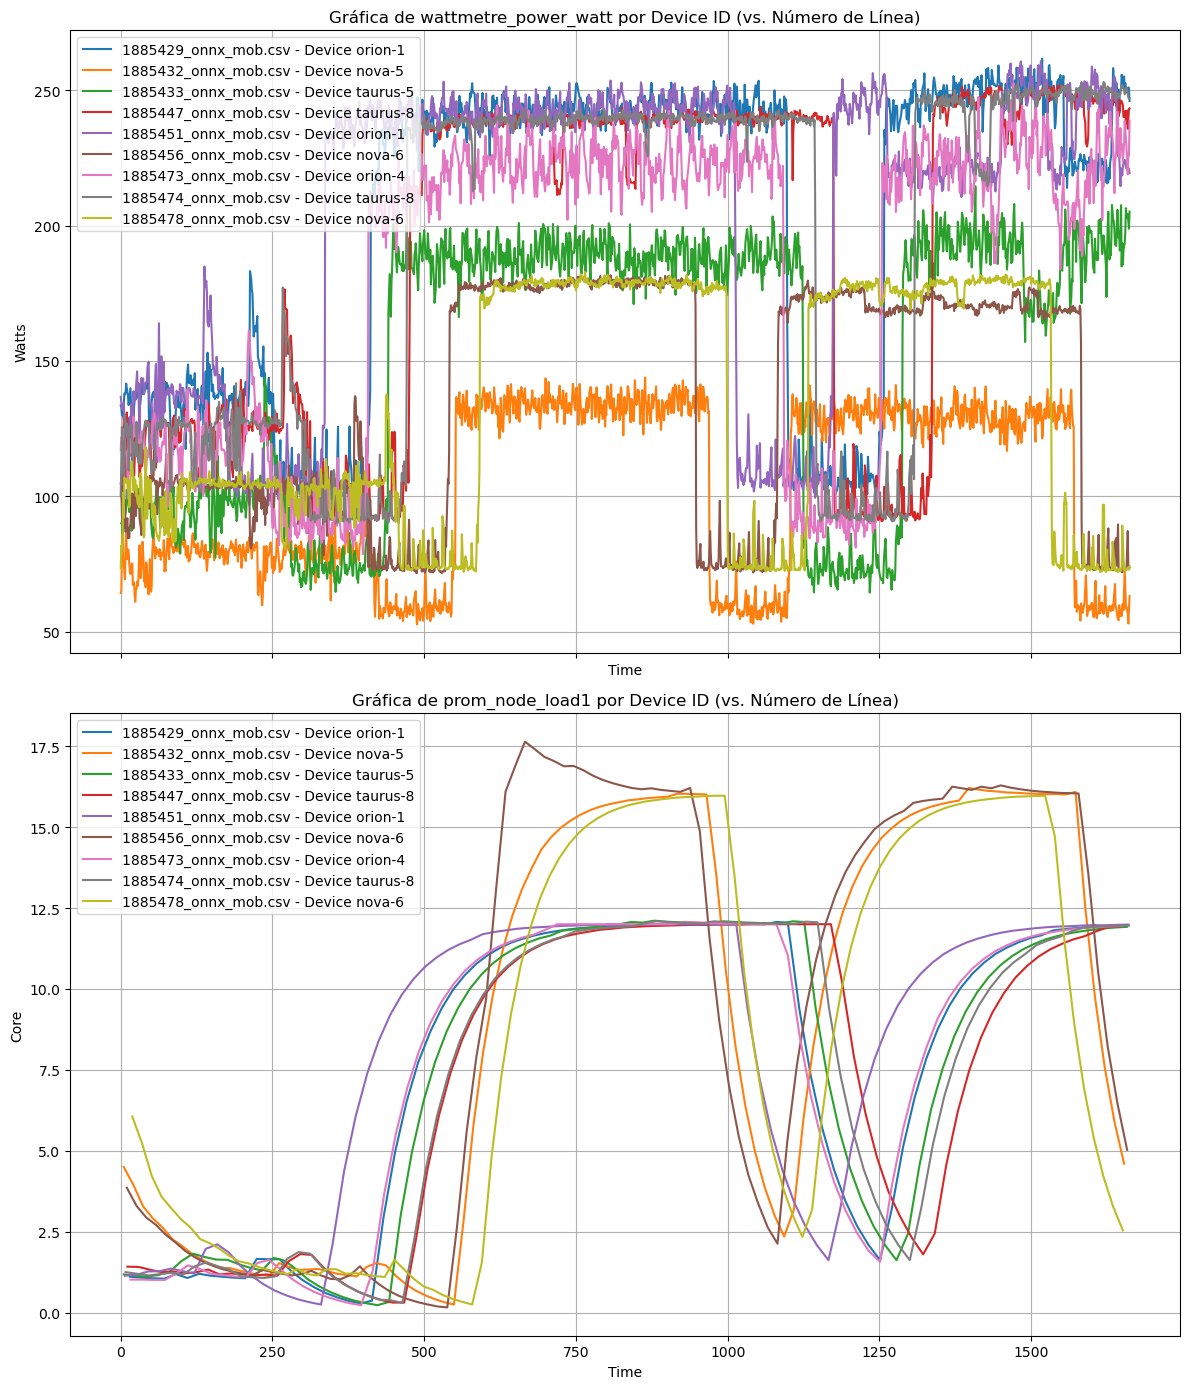

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Directorio donde se encuentran los archivos CSV
directorio_csv = '20250601/onnx/mob'
patron_csv = os.path.join(directorio_csv, '*.csv')
archivos_csv = glob.glob(patron_csv)

metricas_a_graficar = ['wattmetre_power_watt', 'prom_node_load1']
num_metricas = len(metricas_a_graficar)

# Diccionario para almacenar los DataFrames recortados por archivo
dataframes_recortados = {}

min_filas = float('inf')
filas_por_archivo = {}

# Fase 1 y 2: Leer archivos y contar líneas
print("Contando líneas de los archivos CSV...")
for archivo in archivos_csv:
    try:
        df_temp = pd.read_csv(archivo)
        num_filas = len(df_temp)
        filas_por_archivo[archivo] = num_filas
        min_filas = min(min_filas, num_filas)
        print(f"- {archivo}: {num_filas} líneas")
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

print(f"\nEl número mínimo de filas encontrado es: {min_filas}")

# Fase 3 y 4: Recortar los DataFrames y crear un nuevo índice
print("\nRecortando los DataFrames y creando un índice secuencial...")
for archivo in archivos_csv:
    try:
        df = pd.read_csv(archivo)
        num_filas_original = len(df)
        if num_filas_original > min_filas:
            diferencia = num_filas_original - min_filas
            inicio = diferencia // 2
            fin = num_filas_original - (diferencia - inicio)
            df_recortado = df[inicio:fin].copy().reset_index(drop=True)
        else:
            df_recortado = df.copy().reset_index(drop=True)

        # Crear el nuevo índice secuencial
        df_recortado['line_number'] = df_recortado.index
        dataframes_recortados[archivo] = df_recortado
        print(f"- {archivo}: Recortado a {len(df_recortado)} líneas y con índice secuencial.")

    except Exception as e:
        print(f"Error al procesar {archivo}: {e}")

# Fase 5: Graficar usando el índice secuencial como eje x
print("\nGenerando las gráficas con el número de línea como eje x...")
fig, axes = plt.subplots(num_metricas, 1, figsize=(12, 7 * num_metricas), sharex=True)
if num_metricas == 1:
    axes = [axes]

for i, metrica in enumerate(metricas_a_graficar):
    # Definir label y
    l_y = ['Watts','Core']
    if (metrica == 'wattmetre_power_watt' or metrica == 'bmc_node_power_watt'):
        y_label = l_y[0]
    else: y_label = l_y[1]

    ax = axes[i]
    ax.set_title(f'Gráfica de {metrica} por Device ID (vs. Número de Línea)')
    ax.set_ylabel(y_label)
    ax.set_xlabel('Time') # Label del eje x actualizado
    ax.grid(True)

    for archivo, df_recortado in dataframes_recortados.items():
        df_filtrado = df_recortado[df_recortado['metric_id'] == metrica].copy()
        if not df_filtrado.empty:
            for device_id in df_filtrado['device_id'].unique():
                df_device = df_filtrado[df_filtrado['device_id'] == device_id]
                nombre_base = os.path.basename(archivo)
                ax.plot(df_device['line_number'], df_device['value'], label=f'{nombre_base} - Device {device_id}')

    ax.legend()

plt.tight_layout()
plt.show()

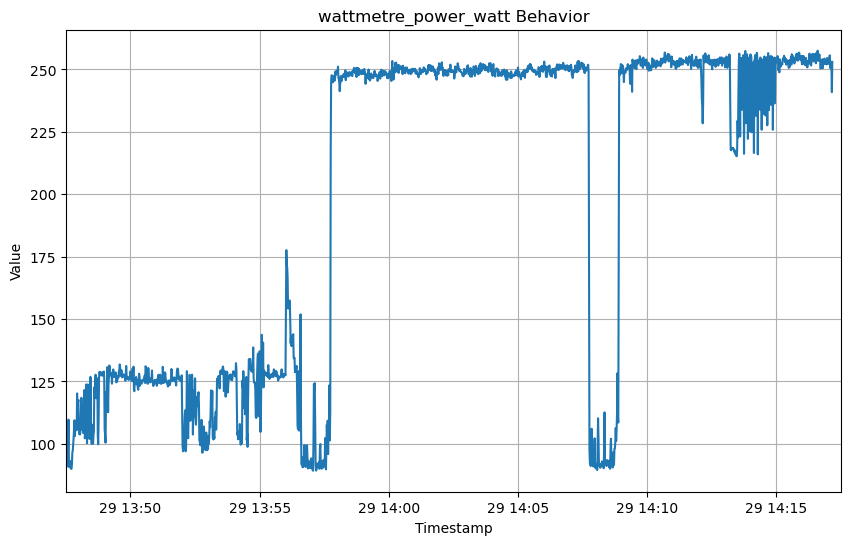

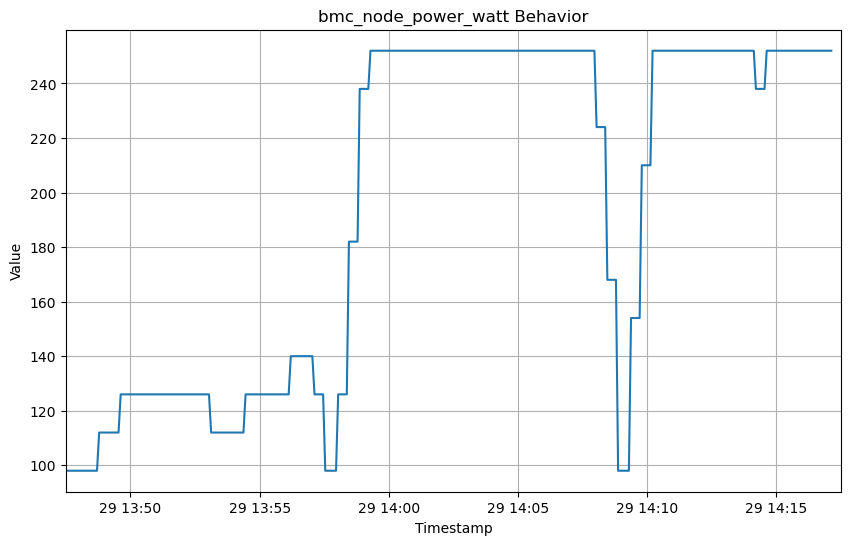

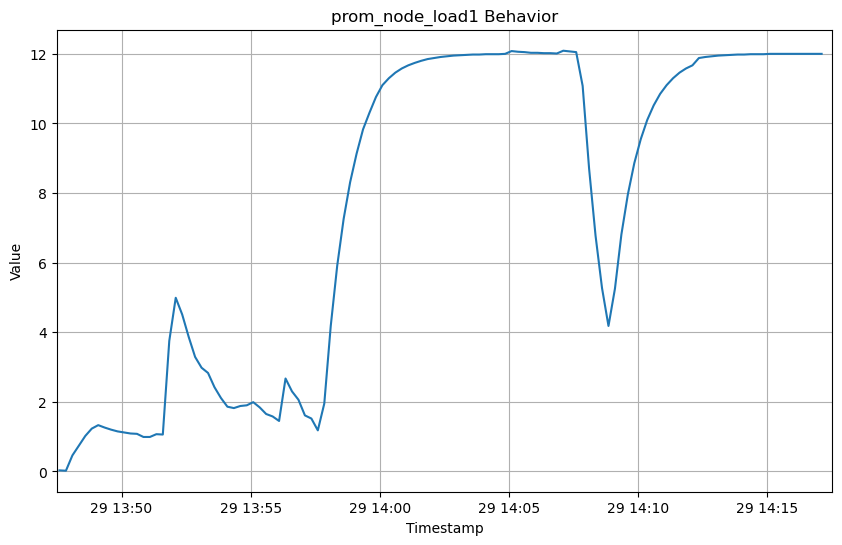

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo CSV.  Reemplaza 'tu_archivo.csv' con el nombre real de tu archivo.
try:
    df = pd.read_csv('job1885004.csv')
except FileNotFoundError:
    print("Error: No se encontró el archivo 'tu_archivo.csv'. Asegúrate de que el nombre del archivo sea correcto y que esté en la misma carpeta que tu notebook, o especifica la ruta completa al archivo.")
    exit()

# Lista de las metric_id que quieres graficar
metricas_a_graficar = ['wattmetre_power_watt', 'bmc_node_power_watt', 'prom_node_load1']

# Define el rango de tiempo que deseas mostrar (formato 'YYYY-MM-DD HH:MM:SS+HH:MM')
fecha_inicio = '2025-05-29 13:47:30+02:00'
fecha_fin = '2025-05-29 14:17:30+02:00'

# Convertir las fechas a objetos datetime de pandas
inicio_rango = pd.to_datetime(fecha_inicio)
fin_rango = pd.to_datetime(fecha_fin)

# Iterar sobre cada métrica y crear un gráfico con el rango de tiempo
for metrica in metricas_a_graficar:
    # Filtrar el DataFrame para la métrica actual
    df_filtrado = df[df['metric_id'] == metrica].copy()

    # Asegurarse de que 'timestamp' sea de tipo datetime
    if not pd.api.types.is_datetime64_any_dtype(df_filtrado['timestamp']):
        df_filtrado.loc[:, 'timestamp'] = pd.to_datetime(df_filtrado['timestamp'])

    # Filtrar el DataFrame por el rango de tiempo
    df_filtrado_rango = df_filtrado[(df_filtrado['timestamp'] >= inicio_rango) & (df_filtrado['timestamp'] <= fin_rango)]

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado_rango['timestamp'], df_filtrado_rango['value'])
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(f'{metrica} Behavior')
    plt.xlim(inicio_rango, fin_rango)  # Establecer los límites del eje x
    plt.grid(True)
    plt.show()


In [6]:
import pandas as pd

# Nombre del archivo CSV de entrada
nombre_archivo_entrada_csv = 'job1885004.csv'

# Nombre del archivo CSV de salida
nombre_archivo_salida_csv = 'job1885004-all.csv'

# Define el rango de tiempo para filtrar los datos (formato 'YYYY-MM-DD HH:MM:SS+HH:MM')
fecha_inicio_filtro = '2025-05-29 13:47:30+02:00'
fecha_fin_filtro = '2025-05-29 14:17:30+02:00'

try:
    # Cargar el archivo CSV
    df = pd.read_csv(nombre_archivo_entrada_csv)

    # Convertir la columna 'timestamp' a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601', errors='raise')

    # Convertir las fechas de filtro a objetos datetime de pandas
    inicio_filtro = pd.to_datetime(fecha_inicio_filtro)
    fin_filtro = pd.to_datetime(fecha_fin_filtro)

    # Filtrar el DataFrame por el rango de tiempo
    df_filtrado_tiempo = df[(df['timestamp'] >= inicio_filtro) & (df['timestamp'] <= fin_filtro)].copy()

    # Resetear el índice del DataFrame filtrado
    df_reset_index = df_filtrado_tiempo.reset_index(drop=True).copy()

    # Renombrar la columna 'timestamp' a 'time'
    df_renombrado = df_reset_index.rename(columns={'timestamp': 'time'}).copy()

    # Asignar el nuevo índice a la columna 'time'
    df_renombrado['time'] = df_renombrado.index

    # Guardar el nuevo DataFrame a un archivo CSV
    df_renombrado.to_csv(nombre_archivo_salida_csv, index=False)

    print(f"Se ha creado el archivo '{nombre_archivo_salida_csv}' con la columna 'time' iniciando en cero y los datos filtrados por el rango de tiempo.")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{nombre_archivo_entrada_csv}'. Asegúrate de que el nombre del archivo sea correcto y que esté en la misma carpeta que tu notebook, o especifica la ruta completa al archivo.")
except ValueError as ve:
    print(f"Error al convertir la columna 'timestamp': {ve}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Se ha creado el archivo 'job1885004-all.csv' con la columna 'time' iniciando en cero y los datos filtrados por el rango de tiempo.


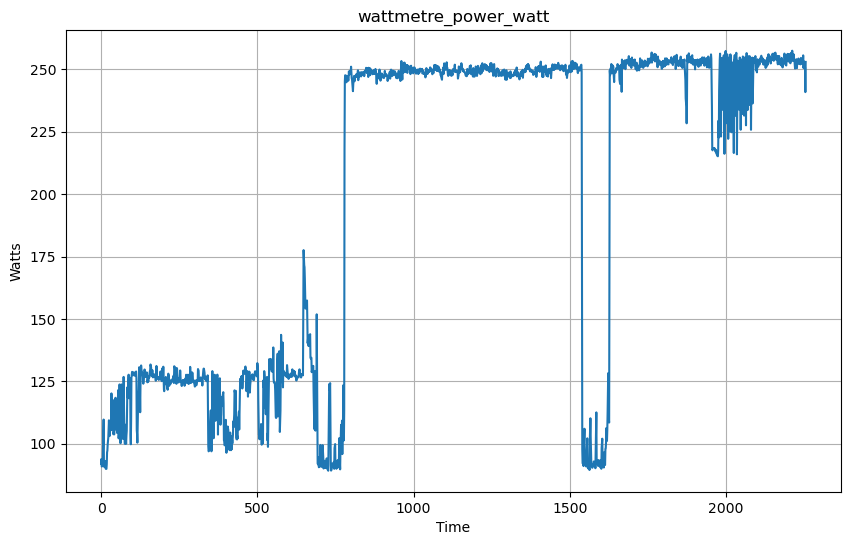

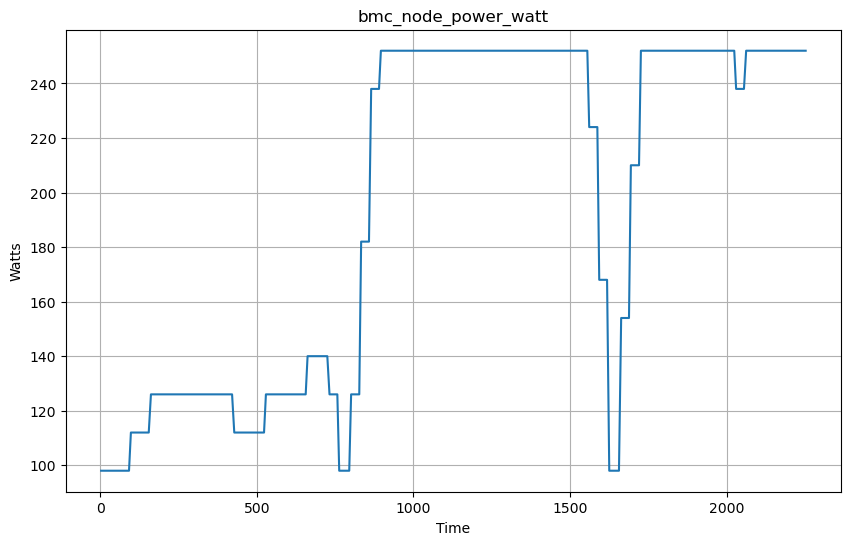

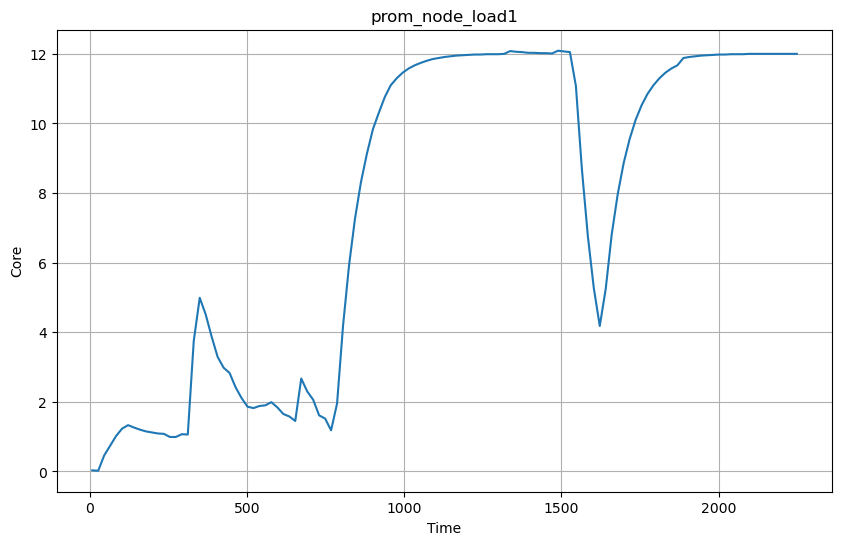

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame se llama 'df' (si no, reemplázalo con el nombre correcto)
# Si aún no has cargado el CSV, descomenta y ajusta la siguiente línea:
df = pd.read_csv('job1885004-all.csv')

# Lista de las metric_id que quieres graficar
metricas_a_graficar = ['wattmetre_power_watt', 'bmc_node_power_watt', 'prom_node_load1']

# Iterar sobre cada métrica y crear un gráfico
for metrica in metricas_a_graficar:
    # Filtrar el DataFrame para la métrica actual
    df_filtrado = df[df['metric_id'] == metrica].copy()

    l_y = ['Watts','Core']
    if (metrica == 'wattmetre_power_watt' or metrica == 'bmc_node_power_watt'):
        y_label = l_y[0]
    else: y_label = l_y[1]

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado['time'], df_filtrado['value'])
    plt.xlabel('Time')
    plt.ylabel(y_label)
    plt.title(f'{metrica}')
    plt.grid(True)
    plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame se llama 'df' (si no, reemplázalo con el nombre correcto)
# Si aún no has cargado el CSV, descomenta y ajusta la siguiente línea:
df = pd.read_csv('job1885004-all.csv')

# Lista de las metric_id que quieres graficar
metricas_a_graficar = ['wattmetre_power_watt', 'bmc_node_power_watt', 'prom_node_load1']

# Iterar sobre cada métrica y crear un gráfico
for metrica in metricas_a_graficar:
    # Filtrar el DataFrame para la métrica actual
    df_filtrado = df[df['metric_id'] == metrica].copy()

    l_y = ['Watts', 'Core']
    if (metrica == 'wattmetre_power_watt' or metrica == 'bmc_node_power_watt'):
        y_label = l_y[0]
    else:
        y_label = l_y[1]

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado['time'], df_filtrado['value'])
    plt.xlabel('Time')
    plt.ylabel(y_label)
    plt.title(f'{metrica}')
    plt.grid(True)

    # Guardar la gráfica como .png
    nombre_archivo_png = f"job1885004-all-{metrica.replace('_', '-')}.png"
    plt.savefig(nombre_archivo_png)
    plt.close() # Cierra la figura para liberar memoria

    print(f"Gráfica guardada como: {nombre_archivo_png}")

print("Todas las gráficas han sido guardadas.")

Gráfica guardada como: job1885004-all-wattmetre-power-watt.png
Gráfica guardada como: job1885004-all-bmc-node-power-watt.png
Gráfica guardada como: job1885004-all-prom-node-load1.png
Todas las gráficas han sido guardadas.
